# Arbeitgeber der Visaantragsteller

In [1]:
import cleanup
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
plt.style.use('../own_style.mplstyle')

In [2]:
# cleanup.generate_cleaned_df()


In [3]:
col_list = ["us_economic_sector", "employer_name", "class_of_admission", "country_of_citizenship", "employer_state"]
visas_df = pd.read_csv('../data/us_perm_visas_cleaned.csv', usecols=col_list)

C:\Users\andre\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
visas_df.head ()

,employer_state,country_of_citizenship,us_economic_sector,employer_name,class_of_admission
0,NEW YORK,ARMENIA,IT,NETSOFT USA INC.,J-1
1,NEW YORK,POLAND,Other Economic Sector,PINNACLE ENVIRONEMNTAL CORP,B-2
2,VIRGINIA,INDIA,Aerospace,"SCHNABEL ENGINEERING, INC.",H-1B
3,NEW YORK,SOUTH KOREA,Other Economic Sector,EBENEZER MISSION CHURCH,B-2
4,NEW YORK,CANADA,Advanced Mfg,ALBANY INTERNATIONAL CORP.,L-1


Im Datensatz sind verschiedene Visaarten vertreten. Es soll ein kurzer Blick auf deren Verteilung geworfen werden.

In [5]:
visas_df["class_of_admission"].value_counts(normalize=True).head(10)

H-1B          0.805133
L-1           0.056720
F-1           0.042519
Not in USA    0.024431
TN            0.012133
E-2           0.012053
B-2           0.009482
Parolee       0.007618
EWI           0.005562
J-1           0.002740
Name: class_of_admission, dtype: float64

In [6]:
visas_df["class_of_admission"].value_counts(normalize=True).cumsum().head(10)

H-1B          0.805133
L-1           0.861853
F-1           0.904372
Not in USA    0.928803
TN            0.940936
E-2           0.952989
B-2           0.962471
Parolee       0.970090
EWI           0.975651
J-1           0.978391
Name: class_of_admission, dtype: float64

In [7]:
visas_df["employer_name"].isna().sum()

12

Der Datensatz enthält 12 Einträge ohne angegebenen Arbeitgeber. Diese entfernen wir.

In [8]:
visas_df.dropna(subset = ["employer_name"], inplace=True)


Welche Arbeitgeber sind die größten Nutzer des Visa?
Um die Namen der Arbeitgeber besser lesen zu können, wechseln wir auf horizontale Balkendiagramme.

<AxesSubplot:>

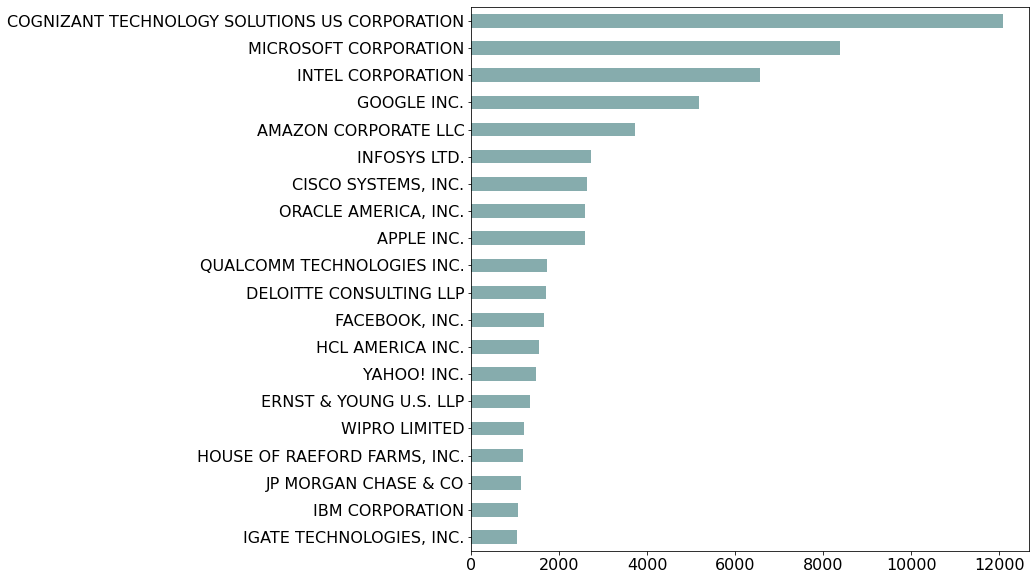

In [9]:
visas_df["employer_name"].value_counts()[:20].sort_values().plot(kind="barh", figsize=(10,10))




In [10]:

visas_df["employer_name"].value_counts(normalize=True).cumsum().head(20)

COGNIZANT TECHNOLOGY SOLUTIONS US CORPORATION    0.032272
MICROSOFT CORPORATION                            0.054628
INTEL CORPORATION                                0.072162
GOOGLE INC.                                      0.085960
AMAZON CORPORATE LLC                             0.095894
INFOSYS LTD.                                     0.103152
CISCO SYSTEMS, INC.                              0.110188
ORACLE AMERICA, INC.                             0.117091
APPLE INC.                                       0.123991
QUALCOMM TECHNOLOGIES INC.                       0.128559
DELOITTE CONSULTING LLP                          0.133095
FACEBOOK, INC.                                   0.137505
HCL AMERICA INC.                                 0.141579
YAHOO! INC.                                      0.145473
ERNST & YOUNG U.S. LLP                           0.149056
WIPRO LIMITED                                    0.152232
HOUSE OF RAEFORD FARMS, INC.                     0.155368
JP MORGAN CHAS

Die 20 am häufigsten vorkommenden Arbeitgeber machen nur 16% der gesamten Visaanträge aus.

# Branchen

In welcher Branche fangen die Visa Bewerber an zu arbeiten? Hierzu wird eine Liste mit den den einzelnen Branchen/Sektoren erstellt

ACHTUNG: Der Datensatz enthält nur bei 129.067 Zeilen Branchendaten. Leider liegen hier nur lückenhafte Informationen vor.

In [11]:
visas_df["us_economic_sector"].count().sum()


129067

Durch die fehlenden Branchendaten, kann eine Auswertung verfälscht werden.
Dies soll näher betrachtet werden:


In [12]:
count_of_sectors_df = visas_df[["us_economic_sector", "employer_name"]].groupby(['employer_name'], dropna=False)["us_economic_sector"].nunique()
count_of_employers_df = visas_df[["employer_name"]].groupby(['employer_name'], dropna=False)["employer_name"].count()

In [13]:
count_of_employers_df = count_of_employers_df.sort_values().to_frame().rename_axis(None)
count_of_sectors_df = count_of_sectors_df.sort_values().to_frame().rename_axis(None)


In [14]:
count_per_employer_df = count_of_employers_df.merge(count_of_sectors_df,  left_index=True, right_index=True)

In [15]:
count_per_employer_df = count_per_employer_df.rename(columns={"employer_name": "Entries_Count", "us_economic_sector": "Sectors_Count"})

In [16]:
count_per_employer_df.sort_values(by="Entries_Count", ascending=False).head(20)


,Entries_Count,Sectors_Count
COGNIZANT TECHNOLOGY SOLUTIONS US CORPORATION,12081,1
MICROSOFT CORPORATION,8369,3
INTEL CORPORATION,6564,1
GOOGLE INC.,5165,1
AMAZON CORPORATE LLC,3719,2
INFOSYS LTD.,2717,1
"CISCO SYSTEMS, INC.",2634,1
"ORACLE AMERICA, INC.",2584,1
APPLE INC.,2583,1
QUALCOMM TECHNOLOGIES INC.,1710,3


Es ist zu sehen, dass bei vielen Arbeitgeber teilweise mehrere Sektorangaben, oder gar keine Sektorangaben vorliegen.

Vielleicht lässt sich dies bereinigen. Wir werden einen genaueren Blick auf die Sektorangaben bei den 20 Arbeitgeber mit den meisten Datensatzeinträgen werfen.

In [17]:
topDf = visas_df["employer_name"].value_counts().nlargest(
    20).reset_index()
topDf.columns = ["employer_name", 'count']
topDf = topDf.set_index(["employer_name"])
df_top = visas_df.loc[
    visas_df["employer_name"].isin(topDf.reset_index()["employer_name"])]



In [18]:
df_top_normalized_case_status = df_top["us_economic_sector"].groupby(df_top["employer_name"]).value_counts(dropna=False
       ).reset_index(name='counts')

In [19]:
#df_top_normalized_case_status

<AxesSubplot:ylabel='employer_name'>

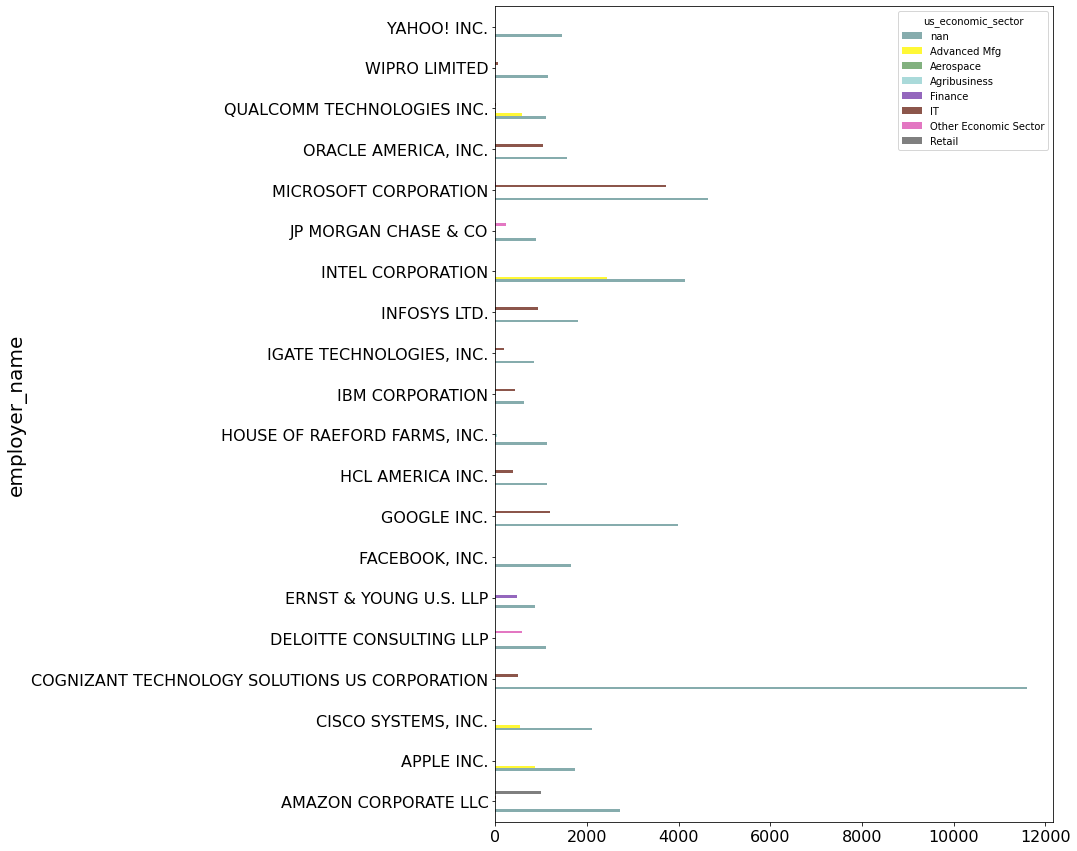

In [20]:
df_top_normalized_case_status.pivot(index='employer_name', columns='us_economic_sector', values='counts').plot(kind="barh", figsize=(10,15))

In [21]:
df_top_normalized_case_status.pivot(index='employer_name', columns='us_economic_sector', values='counts')

us_economic_sector,NaN,Advanced Mfg,Aerospace,Agribusiness,Finance,IT,Other Economic Sector,Retail
employer_name,,,,,,,,
AMAZON CORPORATE LLC,2716.0,NaN,NaN,NaN,NaN,10.0,NaN,993.0
APPLE INC.,1730.0,853.0,NaN,NaN,NaN,NaN,NaN,NaN
"CISCO SYSTEMS, INC.",2108.0,526.0,NaN,NaN,NaN,NaN,NaN,NaN
COGNIZANT TECHNOLOGY SOLUTIONS US CORPORATION,11599.0,NaN,NaN,NaN,NaN,482.0,NaN,NaN
DELOITTE CONSULTING LLP,1114.0,NaN,NaN,NaN,1.0,1.0,582.0,NaN
ERNST & YOUNG U.S. LLP,874.0,NaN,NaN,NaN,467.0,NaN,NaN,NaN
"FACEBOOK, INC.",1651.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GOOGLE INC.,3980.0,NaN,NaN,NaN,NaN,1185.0,NaN,NaN
HCL AMERICA INC.,1136.0,NaN,NaN,NaN,NaN,388.0,1.0,NaN


Es lässt sich herauslesen, dass es durchaus bei allen Arbeitgebern Fehler im Datensatz gibt, jedoch nur ein Sektor, neben den NaN Werten, hauptsächlich besteht.
Besipiel Amazon:
Es liegen die Sektoren:
- NaN (2716)
- Retail (993)
- IT (10)
vor.

Wir werden im Nachgang versuchen, bei einem Arbeitgeber nur einen Sektor zu bestimmen, indem wir alle Sektoren eines Arbeitgebers, durch die Gruppe mit den meisten Angaben überschreiben.
Amazon würde nach dieser Logik zum "Retail" zählen.

In [22]:
new_sectors = df_top_normalized_case_status[ df_top_normalized_case_status["us_economic_sector"].isna() == False]

In [23]:
new_sectors[new_sectors.groupby(["employer_name"])['counts'].transform(max) == new_sectors['counts']].reset_index(drop=True)

,employer_name,us_economic_sector,counts
0,AMAZON CORPORATE LLC,Retail,993
1,APPLE INC.,Advanced Mfg,853
2,"CISCO SYSTEMS, INC.",Advanced Mfg,526
3,COGNIZANT TECHNOLOGY SOLUTIONS US CORPORATION,IT,482
4,DELOITTE CONSULTING LLP,Other Economic Sector,582
5,ERNST & YOUNG U.S. LLP,Finance,467
6,GOOGLE INC.,IT,1185
7,HCL AMERICA INC.,IT,388
8,"HOUSE OF RAEFORD FARMS, INC.",Agribusiness,39
9,IBM CORPORATION,IT,421


Die Ergebnisse der Top 20 Arbeitgeber scheinen valide. Wir werden den Schritt nun für die gesamte Anzahl an verfügbaren Arbeitgeber wiederholen.

In [24]:
new_sectors = visas_df["us_economic_sector"].groupby(visas_df["employer_name"]).value_counts(dropna=False
       ).reset_index(name='counts')


In [25]:
new_sectors = new_sectors[ new_sectors["us_economic_sector"].isna() == False]

In [26]:
new_sectors = new_sectors[new_sectors.groupby(["employer_name"])['counts'].transform(max) == new_sectors['counts']].reset_index(drop=True)


In [27]:
new_sectors["employer_name"].value_counts()

INSTITUTE IPRE. PROFESS RESEARCH&EDUCATIONAL CORP    3
UNIVERSITY HEALTHSYSTEM CONSORTIUM                   3
QIAGEN INC.                                          3
KIKKERLAND DESIGN INC.                               2
EMSI                                                 2
                                                    ..
H&M DEVELOPMENT, LLC                                 1
SANDVIK MINING AND CONSTRUCTION USA, LLC             1
DIALYSIS CLINIC, INC.                                1
LL FUNDS, LLC                                        1
QUEST GLOBAL SERVICES NA INC                         1
Name: employer_name, Length: 33502, dtype: int64

In [28]:
new_sectors[new_sectors["employer_name"]=="QIAGEN INC."]

,employer_name,us_economic_sector,counts
24117,QIAGEN INC.,Advanced Mfg,1
24118,QIAGEN INC.,Biotechnology,1
24119,QIAGEN INC.,Other Economic Sector,1


Bei manchen Arbeitgebern, konnte nicht autmoatisch der meist vorkommende Sektor zugewiesen werden, da mehrere Sektoren gleich oft vorkommen.
Dies sollte jedoch eher die Ausnahme als die Regel sein und betrifft nur Arbeitgeber mit einer geringen Anzahl an Einträgen im Datensatz.
Wir werden Duplikate verwerfen, somit bleibt nur noch ein Sektor je Arbeitgeber übrig.

In [29]:
new_sectors.count()

employer_name         33744
us_economic_sector    33744
counts                33744
dtype: int64

In [30]:
new_sectors = new_sectors.drop_duplicates(subset=['employer_name'])

In [31]:
new_sectors.count()

employer_name         33502
us_economic_sector    33502
counts                33502
dtype: int64

Nun ermitteln wir die Anzahl an Einträgen je Arbeitgeber und weisen diese die ermittelten Sektoren zu.


In [32]:
sectors_df = visas_df["employer_name"].value_counts().to_frame()

In [33]:
del new_sectors["counts"]

In [34]:
sectors_df = sectors_df.rename(columns={"employer_name": "Entries_Count"})

In [35]:
sectors_df

,Entries_Count
COGNIZANT TECHNOLOGY SOLUTIONS US CORPORATION,12081
MICROSOFT CORPORATION,8369
INTEL CORPORATION,6564
GOOGLE INC.,5165
AMAZON CORPORATE LLC,3719
...,...
BHP HOLDING PARTNERS LTD,1
GREG J NIELSEN DDS PROFESSIONAL LLC,1
COURTELIS COMPANY,1
"DIGITAL ASSURANCE CERTIFICATION, LLC",1


In [36]:
sectors_df = sectors_df.merge(new_sectors, left_index = True, right_on="employer_name").reset_index(drop=True)

In [37]:
del sectors_df["employer_name"]


In [38]:
sectors_df

,Entries_Count,us_economic_sector
0,12081,IT
1,8369,IT
2,6564,Advanced Mfg
3,5165,IT
4,3719,Retail
...,...,...
33497,1,Health Care
33498,1,Educational Services
33499,1,Hospitality
33500,1,IT


Als letztes geben wir die ermittelten Ergebnisse mittels eines Kreisdiagrammes aus.
Um das Kreisdiagramm übersichtlich zu halten, geben wir nur die 10 am meisten vorkommenden Sektoren aus.


<AxesSubplot:ylabel='Entries_Count'>

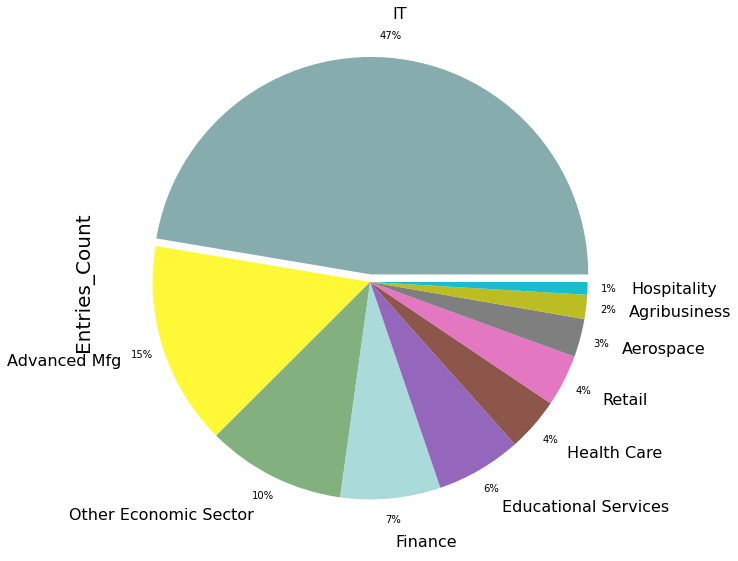

In [39]:
explode = (0.035, 0, 0, 0,0,0,0,0,0,0)
sectors_df.groupby("us_economic_sector").sum().sort_values(by="Entries_Count", ascending=False)[:10].plot.pie(y='Entries_Count', figsize=(10, 10), legend = False, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2, explode = explode)

Die IT Branche profitiert mit Abstand am meisten von den US Visas.

# Welche Staaten profitieren von des Visa am meisten?

Die Visualisierung wird als Karte mittels go.Choropleth erfolgen. Dieses benötigt die zweistelligen Staatenbezeichnungen für die Ausgabe.
Im Datensatz sind Langformangaben vorhanden. Diese ersetzen wir im Nachgang mit den Kurzbezeichnungen.

Die Kurzbezeichnungen beziehen wir von https://www.infoplease.com/us/postal-information/state-abbreviations-and-state-postal-codes.

In [62]:
visas_df["employer_state"].value_counts()[:10]

CA    93493
TX    45180
NJ    30135
NY    28075
WA    17113
IL    16323
MA    13261
VA    12050
MI    12001
PA    11905
Name: employer_state, dtype: int64

In [41]:
##Territories
web_table = pd.read_html(
    'https://www.infoplease.com/us/postal-information/state-abbreviations-and-state-postal-codes',
    match='Territory/Associate')
states_abbreviations_df = web_table[0]


In [42]:
states_abbreviations_df = states_abbreviations_df.rename(columns={"Territory/Associate": "name"})

In [43]:
##States
web_table = pd.read_html(
    'https://www.infoplease.com/us/postal-information/state-abbreviations-and-state-postal-codes',
    match='State/District')

web_table[0] = web_table[0].rename(columns={"State/District": "name"})
states_abbreviations_df = states_abbreviations_df.append(web_table[0])

In [64]:
states_abbreviations_df.head()


,name,Abbreviation,Postal Code
0,AMERICAN SAMOA,Â,AS
1,GUAM,Guam,GU
2,MARSHALL ISLANDS,Â,MH
3,MICRONESIA,Â,FM
4,NORTHERN MARIANAS,Â,MP


In [45]:
# Standardized Format
states_abbreviations_df['name'] = states_abbreviations_df['name'].str.upper()
abbr_dictionary = states_abbreviations_df.set_index('name')['Postal Code'].to_dict()

# Replace abbreviations by short-names
visas_df['employer_state'] = visas_df['employer_state'].replace(abbr_dictionary)


In [59]:
fig_df = visas_df["employer_state"].value_counts().to_frame().reset_index()

In [63]:
fig_df.head()

,index,employer_state
0,CA,93493
1,TX,45180
2,NJ,30135
3,NY,28075
4,WA,17113


In [55]:
fig = go.Figure(data=go.Choropleth(
    locations=fig_df['index'], # Spatial coordinates
    z = fig_df['employer_state'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Anzahl Einträge",
))

In [65]:
fig.update_layout(
    title_text = 'Anzahl Visaanträge je Bundesstaat',
    geo_scope='usa', # limite map scope to USA
)
fig.show()

In [ ]:
Siehe:
#https://plotly.com/python/choropleth-maps/